In [140]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [131]:
#SpreadSheet Datafile name
file = 'Datasets.xlsx'

#Load spreadsheet
data = pd.read_excel(file)

#Load Dataset 1 into DataFrame
ds1 = pd.read_excel(file, sheet_names = 'Dataset 1', index_col=0)

In [160]:
dataset1.fillna(dataset1.mean(), inplace=True)

,Team,League/Division,Season,Head Coach,Manager,A,AA,AB,B,BA,...,WW,WX,X,XX,XY,Y,YY,YZ,Z,ZZ
Athlete,,,,,,,,,,,,,,,,,,,,,
1,36,5.0,1,7,13.000000,85,90,90,85.775000,84.750000,...,95,90.00000,95.000000,90.000000,95.000000,88.38500,86.309168,83,90.0,88.091912
2,50,5.0,1,7,13.000000,95,92,95,85.635000,84.750000,...,95,84.00000,87.000000,84.000000,95.000000,88.38500,86.309168,85,90.0,88.091912
3,41,5.0,1,7,13.000000,85,85,85,85.425000,84.750000,...,95,86.51773,86.292553,87.196809,95.000000,88.38500,85.000000,90,90.0,88.091912
4,60,1.0,1,10,29.000000,90,80,90,88.000000,88.333333,...,95,85.00000,85.000000,85.000000,93.000000,89.38500,70.000000,95,90.0,95.000000
5,22,1.0,1,10,29.000000,90,90,85,87.300000,88.333333,...,95,70.00000,65.000000,85.000000,93.000000,89.38500,90.000000,82,85.0,93.000000
6,6,1.0,1,10,29.000000,88,88,95,87.953333,88.333333,...,95,85.00000,95.000000,85.000000,93.000000,89.38500,88.000000,87,90.0,88.091912
7,54,4.0,1,21,2.000000,90,85,85,91.666667,91.666667,...,95,93.00000,85.000000,93.000000,93.000000,90.00500,86.309168,80,95.0,88.091912
8,36,4.0,1,21,2.000000,83,83,65,91.666667,91.666667,...,95,90.00000,92.000000,88.000000,93.000000,90.00500,83.000000,75,95.0,88.091912
9,39,4.0,1,21,2.000000,92,95,88,91.666667,91.666667,...,95,90.00000,70.000000,86.000000,93.000000,90.00500,95.000000,90,95.0,88.091912


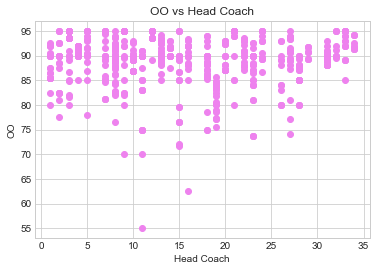

In [161]:
plt.scatter(ds1['Head Coach'], ds1['OO'], color = 'violet')
plt.xlabel('Head Coach')
plt.ylabel('OO')
plt.title('OO vs Head Coach')
plt.show()
plt.clf()

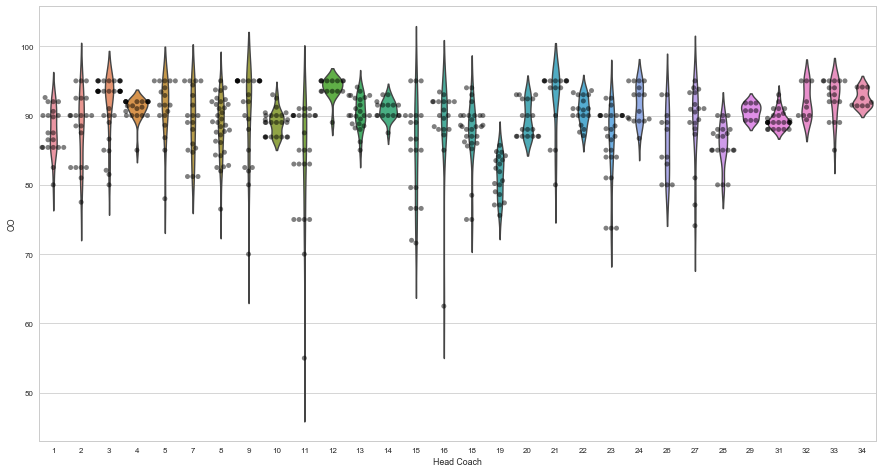

In [166]:
# OO wrt HeadCoach
plt.figure(figsize=(15,8))
sns.set_context('paper')
sns.violinplot(x='Head Coach', y='OO', data=ds1, inner=None)
sns.swarmplot(x='Head Coach', y='OO', data=ds1, color='k', alpha=0.5)

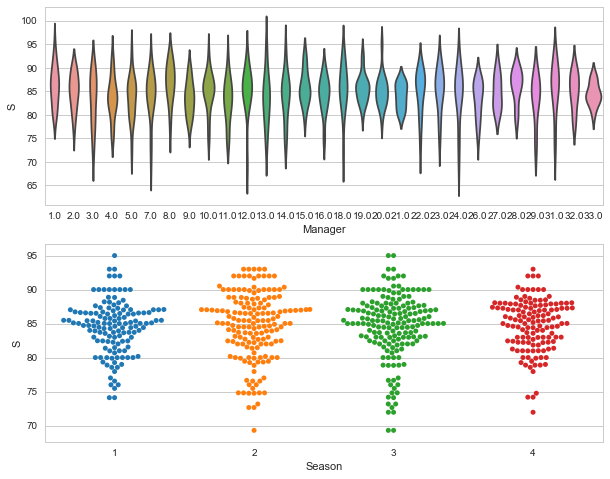

In [182]:
#S wrt Manager and Season
plt.figure(figsize=(10,8))
plt.subplot(211)
sns.violinplot(x='Manager', y='S', data=ds1, inner=None)
sns.set_context('notebook')
plt.subplot(212)

In [97]:
#X = dataset1.values

#imp = Imputer(missing_values = 'NaN', strategy = 'median', axis = 0)

#imp.fit(dataset1)

#X = imp.transform(dataset1)

#X.head(603)

In [83]:
Q1 = ds1.quantile(0.25)
Q3 = ds1.quantile(0.75)
IQR = Q3 - Q1

rows = len(ds1.index)

outliers = ((ds1 < (Q1 - 1.5 * IQR)) | (ds1 > (Q3 + 1.5 * IQR))).sum()
#len(ds1.columns)
#ds1.iloc[:,i]

In [96]:
for c in ds1.columns:
    if (outliers[c]/rows>0.05):
        ds1[c].fillna(ds1[c].median(), inplace=True)
    else:
        ds1[c].fillna(ds1[c].mean(), inplace=True)
        
#print(ds1.head(602))
ds1.describe()

    

,Team,League/Division,Season,Head Coach,Manager,A,AA,AB,B,BA,...,WW,WX,X,XX,XY,Y,YY,YZ,Z,ZZ
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,...,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,35.322259,3.390977,2.504983,15.692691,15.441489,86.511628,87.681063,87.360465,86.270440,84.793781,...,91.755814,86.517730,86.292553,87.196809,91.137874,87.630216,86.309168,86.332226,88.816030,88.091912
std,20.054729,1.135817,1.067197,9.520811,9.020504,8.584746,5.344499,8.201779,3.221625,2.079235,...,9.706946,4.809313,5.322656,4.434991,11.692935,3.282370,5.453200,6.775648,5.407875,3.630317
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,60.000000,55.000000,75.160000,72.750000,...,0.000000,66.000000,65.000000,70.000000,0.000000,74.130000,65.000000,59.000000,55.000000,60.000000
25%,18.250000,3.390977,2.000000,8.000000,8.000000,85.000000,85.000000,85.000000,84.388750,84.793781,...,90.000000,85.000000,85.000000,85.000000,93.000000,86.010000,85.000000,82.000000,87.000000,88.091912
50%,34.500000,3.390977,3.000000,15.000000,15.441489,88.000000,89.000000,90.000000,86.790000,84.793781,...,95.000000,87.000000,87.000000,88.000000,94.000000,87.860000,86.309168,88.000000,90.000000,88.091912
75%,53.000000,3.390977,3.000000,23.000000,22.000000,90.000000,92.000000,92.000000,88.581000,84.793781,...,95.000000,90.000000,90.000000,90.000000,95.000000,90.125000,90.000000,90.000000,92.000000,90.000000
max,69.000000,6.000000,4.000000,34.000000,33.000000,95.000000,95.000000,95.000000,93.333333,93.333333,...,100.000000,95.000000,95.000000,95.000000,95.000000,94.000000,95.000000,95.000000,95.000000,95.000000
